# fifa analysis: improve recruiting
---

# context
This is an exercise i've created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
#### data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

---
# summary
---

context
problem
assumptions
hypothesis
procedure
observation
conclusion

# imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
players = pd.read_csv("CompleteDataset_cleaned.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploration: preferred positions
we have decided that we are just going to use best positions to make recommendations.
However,it is interesting to find out what is the connection between preferred and best positions .
are preferred positions always amongst the best positions?

1. turn the string of preferred positions into a list
2. find out if this list corresponds with the positions for which this player is most skilled
    * is this true for the worst player? 
    * is this true for all players generally?

In [69]:
# turn the string of preferred positions into a list
# players["Preferred Positions"] = players["Preferred Positions"].apply(lambda x: x.split())

# does this list correspond to most skill positions for the worst player?
# it turns out the worst player does not have ratings from his positions

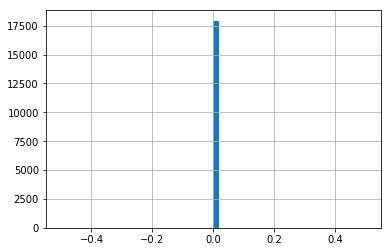

In [70]:
# is preferred position a good indicator for best position?
# TODO: you can modify this to also include information of which that is bigger in the return output
# you could also create a correlation matrix,but this has many more steps
def preferredVersusBest(row):
    preferred = set(row['Preferred Positions'])
    best = set(row['best_positions'])
    overlap = preferred.intersection(best)
    bigger_set = max(len(preferred),len(best))
    return len(overlap)/bigger_set


players.apply(preferredVersusBest, axis=1).hist(bins=50)
# it doesn't look like there is a very strong correlation between preferred and best
# so in my recommendation I will look at best positions,not preferred positions

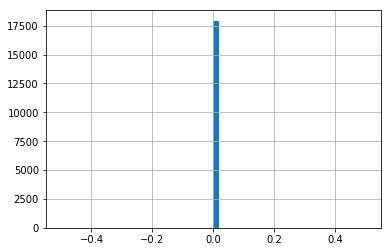

In [71]:
# out of curiosity, I want to find out what is the relationship between preferred and best positions.
# it is too rigorous to require that there be a one-to-one mapping between preferred and best positions.
# to calculate this,I am simply going to see what percentage of preferred positions are amongst best positions
def preferredInBest(row):
    preferred = set(row['Preferred Positions'])
    best = set(row['best_positions'])
    overlap = preferred.intersection(best)
    return len(overlap)/len(preferred)

players['preferred_in_best'] = players.apply(preferredInBest, axis=1)
players['preferred_in_best'].hist(bins=50)

# this is more promising. note that I counted any position that is within 2 of the best

In [72]:
# let's find out how many of the 0 match are due to bad data
players[players['preferred_in_best'] == 0][['Preferred Positions','best_positions']]

# it looks like most of these are goalkeepers. let's assume that if you're a goalkeeper,that is your best position

,Preferred Positions,best_positions
index,,
0,ST LW,"[CF, LF, LS, LW, RF, RS, RW, ST]"
1,RW,"[CAM, CF, LAM, LF, LW, RAM, RF, RW]"
2,LW,"[CAM, CF, LAM, LF, LW, RAM, RF, RW]"
3,ST,"[CAM, CF, LAM, LF, LS, LW, RAM, RF, RS, RW, ST]"
4,GK,[GK]
5,ST,"[CF, LF, LS, RF, RS, ST]"
6,GK,[GK]
7,LW,"[CAM, CF, LAM, LF, LM, LW, RAM, RF, RM, RW]"
8,CDM CM,"[CM, LCM, RCM]"


In [73]:
# for all players who do not have a best position,insert their preferred position as their best position
def fillBestPosition(row):
    if len(row['best_positions']) == 0:
        return row
    else:
        return row['best_positions']

players['best_positions'] = players.apply(fillGoalkeepers, axis=1)

# now rerun the preferred in best check
players['preferred_in_best'] = players.apply(preferredInBest, axis=1)
players['preferred_in_best'].hist(bins=50)

# now we have corrected for all goalkeepers, and for the vast majority of our players, 
# their preferred position is amongst their best positions

NameError: name 'fillGoalkeepers' is not defined

In [ ]:
# check to make sure that every player has a best position
def checkEmptyList(x):
    if len(x) == 0:
        return True
    else:
        return False
    
players[players['best_positions'].apply(checkEmptyList)]



While this exploration was not necessary for making recommendations, gave new insight.
Apparently many players did not have a best position, because they are goalkeepers.
This is a strange situation, goalkeepers are not rated.

either way,this gave us the opportunity to clean up our data, by adding best position data for goalkeepers.

In [ ]:
# now I can add position recommendation to our recruiting

# my premise is that a player is a good replacement if 1 of his best positions
# is also the best position of the person being replaced
# create a filter that checks if any position from 1 list is in the other list
def matchPosition(left_positions,right_positions):
    overlap = set(left_positions).intersection(set(right_positions))
    print(overlap)
    if len(overlap)>0: 
        return True
    else:
        return False

# I will reset the coefficients to see what kind of filtering we get just with position
madrid = players[players["Club"] == "Real Madrid CF"]
worst = madrid.loc[madrid["Overall"].argmin()]

# position_replacements = players[
#     (players['Overall'] >= 1 * worst['Overall']) &
#     (players["Value"] >= 1 * worst["Value"]) &
#     (players["Wage"]  < 0.5 * worst["Wage"]) &
#     (players["Club"] != "Real Madrid CF") &
#     (players['best_positions'].apply(matchPosition,args=(worst['best_positions'])))    
# ]

# position_replacements

In [ ]:
worst

# client recommendation
indeed,we have narrowed our list to 7 recommendations.
* these 7 players are at least 20% better that our player.
* they also provide at least 2000% more value.
* they are also earning at most 50% of our worst players salary.

## next steps
1. make player recommendations based on position
2. rewrite this code so that it can be scaled to any player and parameterized 
3. make recommendations based on age,where younger players are more valuable
4. make recommendations based on geography, where closer players are more valuable
5. take into account a player's  willingness to change teams

## critique

1. your initial goal was to study a player's performance
    * you didn't formulate clear questions: 
        * which metric is the best representation for performance? _overall_
        * which smaller metric is the best predictor for performance?
        * which set of 5 smaller metrics are the best predictors for performance?
    * you didn't make recommendations to your client:
        * should players focus on their best skills or the worst skills to get better performance?
        * which players have the best wage to value ratio?
        * which players have the best wage to overall ratio?
        * who are the weakest players on any given team?
        
2. your secondary goal was to study a team's performance
    * you don't have data on teams winning
    * you didn't study the connection between individual players and team skill
        * what is the best player mix for a good team?
        * what is the best way to predict a team skill based on individual player features?

3. your third goal was to make financial recommendations 
    * which teams have the best wage to value ratios?
    * which teams have the best wage to overall ratios?
    
---

1. each section needs an explicit goal, with steps laid out
2. each section needs an explicit conclusion, that cites the values discovered
3. whenever you learn something from a calculation, you should write that down
4. make your variable names more clear